# MolsMatrixToGridImage Simplifies Code

I [contributed MolsMatrixToGridImage](https://greglandrum.github.io/rdkit-blog/posts/2023-10-25-molsmatrixtogridimage.html) to the RDKit 2023.09.1 release because I found myself writing similar code over and over to draw row-and-column grids of molecules. For projects where each row represented something, such as a molecule and the fragments off a common core, my mental model corresponded to a two-dimensional (nested) data structure, whereas the pre-existing function [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html#rdkit.Chem.Draw.MolsToGridImage) supported only linear (flat) data structures.

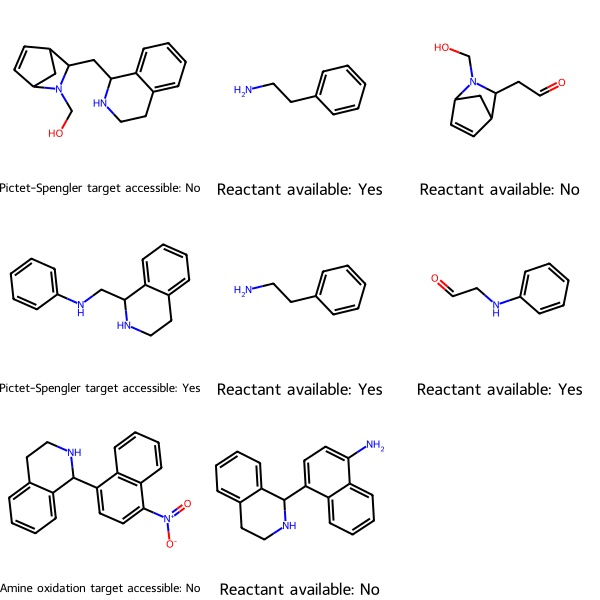

Using [MolsMatrixToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html#rdkit.Chem.Draw.MolsMatrixToGridImage) can save a considerable amount of code. The most extreme example is from my post [Are the Starting Materials for Synthesizing Your Target Molecules Commercially Available?]({% post_url 2023-02-07-Are-the-Starting-Materials-for-Synthesizing-Your-Target-Molecules-Commercially-Available %}). Using MolsMatrixToGridImage requires only one line of code:

        dwg = Draw.MolsMatrixToGridImage(molsMatrix=mols_2D, legendsMatrix=legends_2D)

whereas using MolsToGridImage requires 19 logical lines of code (LLOC) with a total of 45 lines of code (LOC) including three utility functions:

        # Create null molecule (has no atoms) as filler for empty molecule cells in molecular grid plot of results
        null_mol = Chem.MolFromSmiles("")
        pad_rows(mols_2D, longest_row(mols_2D), filler=null_mol)
        pad_rows(legends_2D, longest_row(mols_2D))

        mols = flatten_twoD_list(mols_2D)
        legends = flatten_twoD_list(legends_2D)

        dwg = Draw.MolsToGridImage(mols=mols, legends=legends, molsPerRow=len(mols_2D[0]))

    def flatten_twoD_list(twoD_list: list[list]) -> list:
        """
        Flatten a 2D (nested) list into a 1D (non-nested) list

        :param twoD_list: The 2D list, e.g. [[a], [b, c]]
        :returns: 1D list, e.g. [a, b, c]
        """
        flat_list = []
        for row in twoD_list:
            for item in row:
                flat_list += [item]
        return flat_list

    def longest_row(twoD_list: list[list]) -> int:
        """
        Find the longest row (sublist) a 2D (nested) list

        :param twoD_list: The 2D list, e.g. [[a], [b, c]]
        :returns: Length of the longest row, e.g. 2
        """
        return max(len(row) for row in twoD_list)

    def pad_rows(twoD_list: list[list], row_length: int, filler = "") -> list[list]:
        """
        Pad each row (sublist) in a 2D (nested) list to a given length

        :param twoD_list: The 2D list, e.g. [[a], [b, c]]
        :param row_length: The length to pad to, e.g. 3
        :param filler: The sublist element to pad with, e.g. p
        :returns: Padded 2D list, e.g. [[a, p, p], [b, c, p]]
        """
        for row in twoD_list:
            padding = row_length - len(row)
            row += [filler] * padding
        return twoD_list


I refactored four blog posts that used `MolsToGridImage` to use `MolsMatrixToGridImage` if available in the current Python environment, that is if you have the RDKit 2023.09.1 or later:
- [Are the Starting Materials for Synthesizing Your Target Molecules Commercially Available?]({% post_url 2023-02-07-Are-the-Starting-Materials-for-Synthesizing-Your-Target-Molecules-Commercially-Available %})
- [Draw a Mass Spectrometry Fragmentation Tree Using RDKit]({% post_url 2023-01-02-Mass-Spectrometry-Fragmentation-Tree %})
- [Find the Maximum Common Substructure, and Groups Off It, For a Set of Molecules Using RDKit]({% post_url 2022-12-25-RDKit-Find-Groups-Off-Common-Core %})
- [RDKit Utility to Visualize Retrosynthetic Analysis Hierarchically]({% post_url 2022-11-11-RDKit-Recap-decomposition-tree %})

I also made a [new blog post]({% post_url 2023-10-28-Display-Molecular-Formulas %}) where `MolsMatrixToGridImage` simplifies code by allowing the molecular grid image, and a graph, to be driven by the same nested data structure.